In [38]:
import numpy as np

G = 6.67*10**(-11)
Mstar = 1.989 * 10 **30
k = 1
a = np.logspace(-2.5, 4.0, num=100, base = 10)
a = a*(1.496 *10**11)

#mp = (k*np.sqrt(a)*np.sqrt(Mstar))/(np.sqrt(G))



mp = 0.5*((k**2 * a/G)+(k*np.sqrt(a)*np.sqrt(4*G*Mstar + k**2 * a)/G))

aRV = a/(1.496 *10**11)
mpRV = mp/(5.972*10**24)

#print(mpRV)

In [39]:
a2 = np.arange(4, 4.1, 0.01) 
a3 = np.arange(0.01, 4, 0.020)
aT = np.concatenate([a2,a3])

m2 = np.arange(2.8,50000,5000)
m3 = a3*0.7

print(max(m3))

2.7929999999999993


In [53]:
ap = [0.723,1.0,5.203,9.555,19.218,30.11]
mp = [0.815,1.0,317.8,95.2,14.6,17.2]

/Users/Arjun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


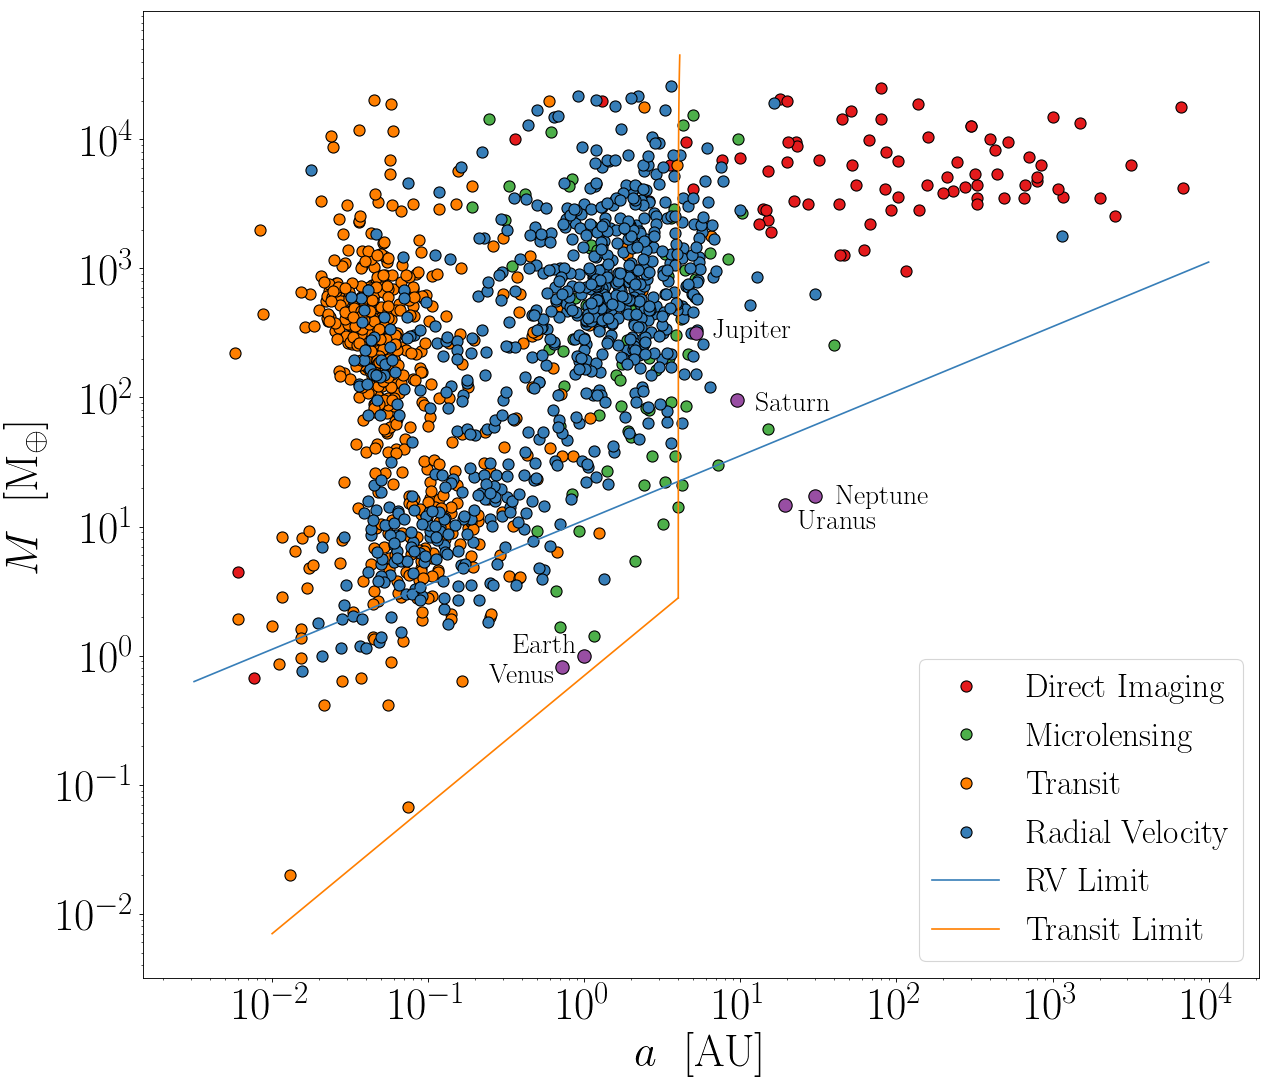

In [132]:
import matplotlib.pyplot as plt
import csv
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size': 40})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

x = []
y = []
x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
mjte = 317.46031746
with open('imaging.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        y.append(float(row[2])*mjte)
        x.append(float(row[14]))

with open('microlensing.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        y1.append(float(row[2])*mjte)
        x1.append(float(row[14]))

with open('rv.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        y2.append(float(row[2])*mjte)
        x2.append(float(row[14]))
        
with open('transit.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        y3.append(float(row[2])*mjte)
        x3.append(float(row[14]))
        
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
plt.loglog(x,y, 'o', color='k', mfc='#e41a1c', markersize= 10, label='Direct Imaging')
plt.loglog(x1,y1, 'o', color='k', mfc='#4daf4a', markersize= 10, label='Microlensing')
plt.loglog(x3,y3, 'o', color='k', mfc='#ff7f00', markersize= 10, label='Transit')
plt.loglog(x2,y2, 'o', color='k', mfc='#377eb8', markersize= 10, label='Radial Velocity')
plt.loglog(aRV,mpRV, color='#377eb8', label='RV Limit' )
plt.loglog(a3,m3, color='#ff7f00', label='Transit Limit' )
plt.loglog(a2,m2, color='#ff7f00')
plt.loglog(ap,mp, 'o', color='k', mfc='#984ea3', markersize= 12)


ax.annotate("Earth",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.56, 1.2), textcoords='data',
            size=25, va="center", ha="center")

ax.annotate("Venus",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.4, 0.7), textcoords='data',
            size=25, va="center", ha="center")

ax.annotate("Jupiter",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(12, 330), textcoords='data',
            size=25, va="center", ha="center")

ax.annotate("Saturn",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(22, 90), textcoords='data',
            size=25, va="center", ha="center")

ax.annotate("Uranus",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(42, 11), textcoords='data',
            size=25, va="center", ha="center")

ax.annotate("Neptune",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(82, 17), textcoords='data',
            size=25, va="center", ha="center")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel('$a \ \ [\mathrm{AU}]$')
plt.ylabel('$M \ \   [\mathrm{M_\oplus}$]')
plt.legend(loc=4, prop={'size': 30})

plt.show()